# Temperature evolution

In [5]:
import numpy as np
import sys 
sys.path.append('../..')
from plot_helper import animate_field
from configs.config import *
%config InlineBackend.figure_format = 'retina' # disable this if not using a retina display

In [6]:
# load grid data: fix save grid
grid = np.load(os.path.join(raw_data_folder, "grid.npy"), allow_pickle=True)
x_array, y_array, z_array = grid

## Proton

In [7]:
proton_temperture = np.load(
    os.path.join(raw_data_folder, "Proton_Derived_Temperature_YZ.npy"),
    allow_pickle=True,
)

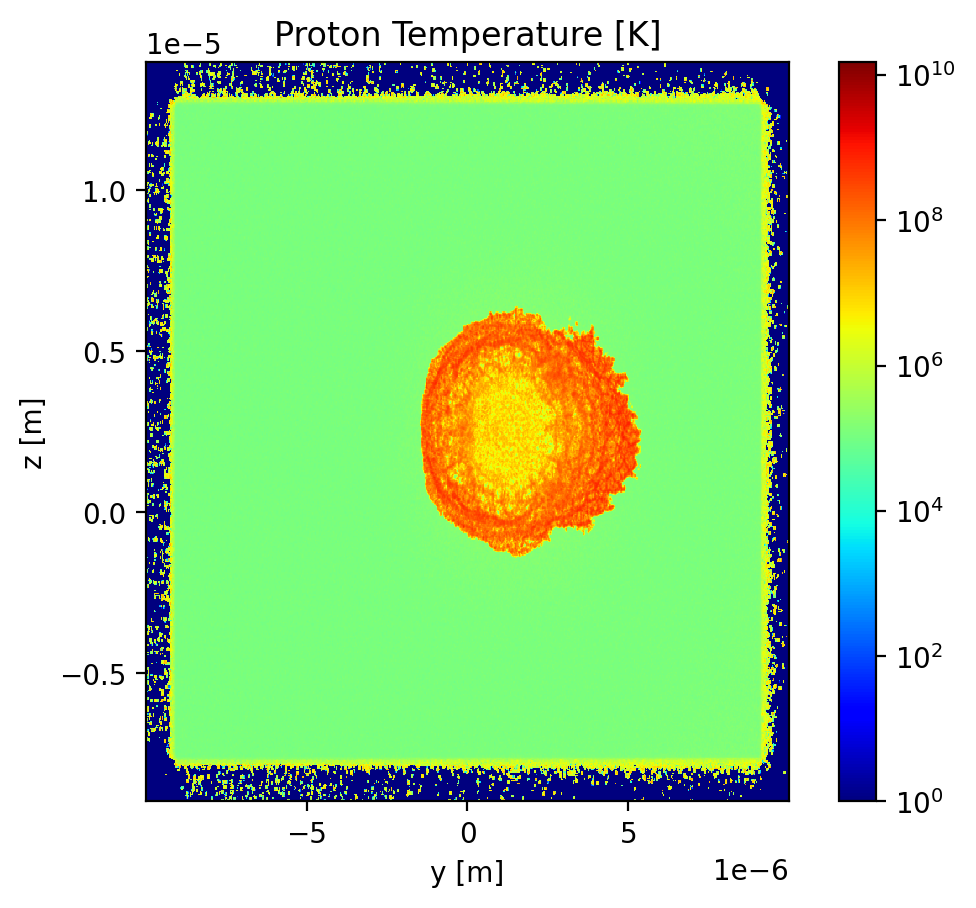

In [8]:
extent = [x_array[0], x_array[-1], y_array[0], y_array[-1]]

# add 1 to avoid log(0)
ani, ax = animate_field(proton_temperture + 1, extent, scale_reduced=1, cmap="jet", log_scale=True)
ax.set_title("Proton Temperature [K]")
ax.set_xlabel("y [m]")
ax.set_ylabel("z [m]")
ani.save(os.path.join(media_folder, "proton_temperature_yz.gif"), fps=10, dpi=300)

## Electron

In [9]:
electron_temperature = np.load(
    os.path.join(raw_data_folder, "Electron_Derived_Temperature_YZ.npy"),
    allow_pickle=True,
)

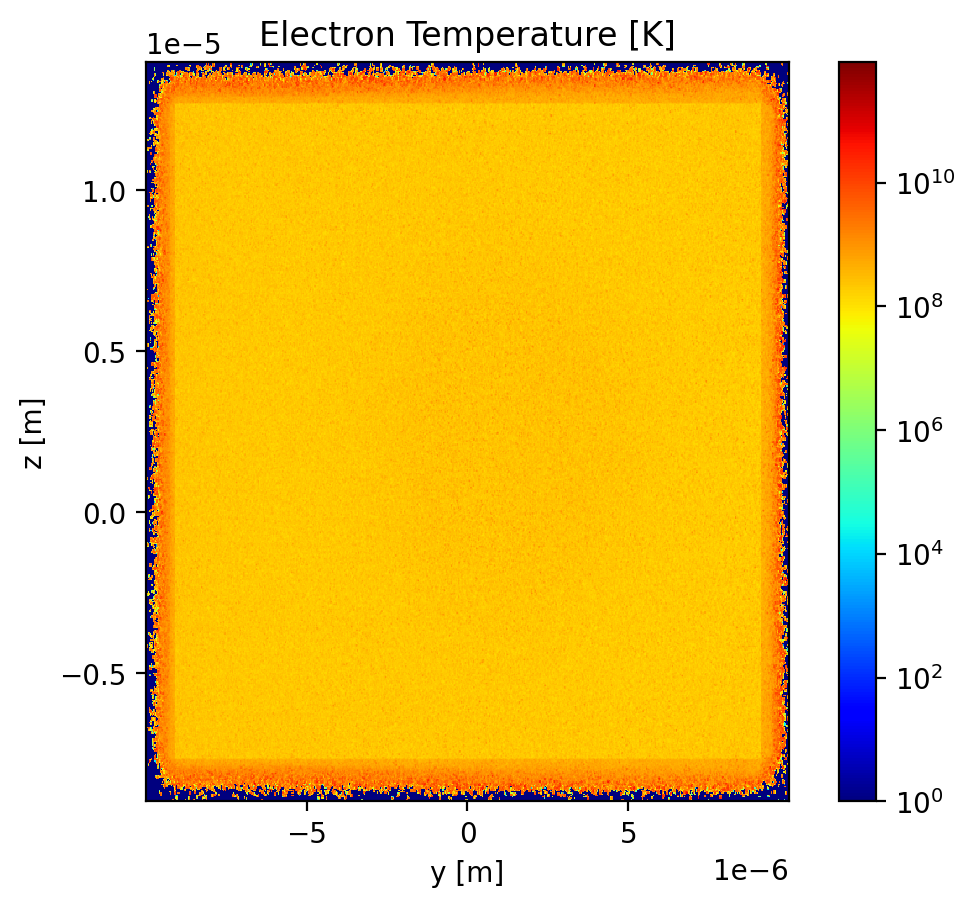

In [10]:
ani, ax = animate_field(
    electron_temperature + 1, extent, scale_reduced=1, cmap="jet", log_scale=True
)
ax.set_title("Electron Temperature [K]")
ax.set_xlabel("y [m]")
ax.set_ylabel("z [m]")
ani.save(os.path.join(media_folder, "electron_temperature_yz.gif"), fps=10, dpi=300)

## Carbon

In [11]:
carbon_temperature = np.load(
    os.path.join(raw_data_folder, "Carbon_Derived_Temperature_YZ.npy"),
    allow_pickle=True,
)

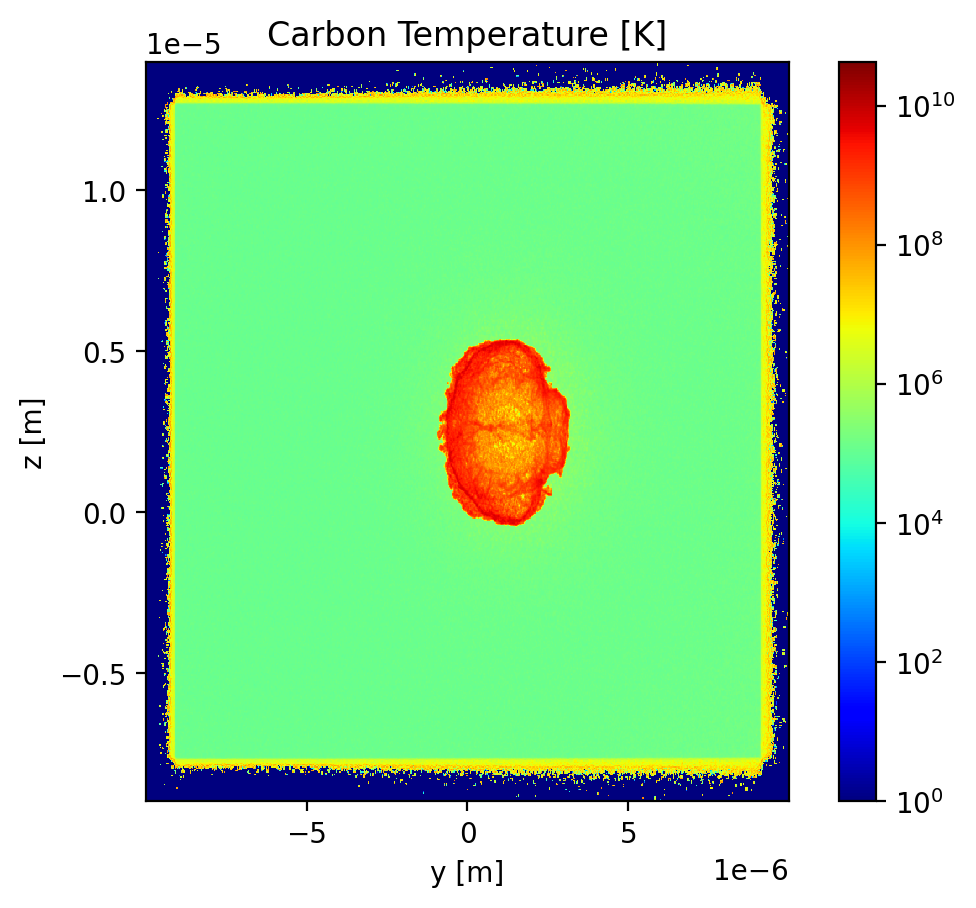

In [12]:
ani, ax = animate_field(
    carbon_temperature + 1, extent, scale_reduced=1, cmap="jet", log_scale=True
)
ax.set_title("Carbon Temperature [K]")
ax.set_xlabel("y [m]")
ax.set_ylabel("z [m]")
ani.save(os.path.join(media_folder, "carbon_temperature_yz.gif"), fps=10, dpi=300)

## All species

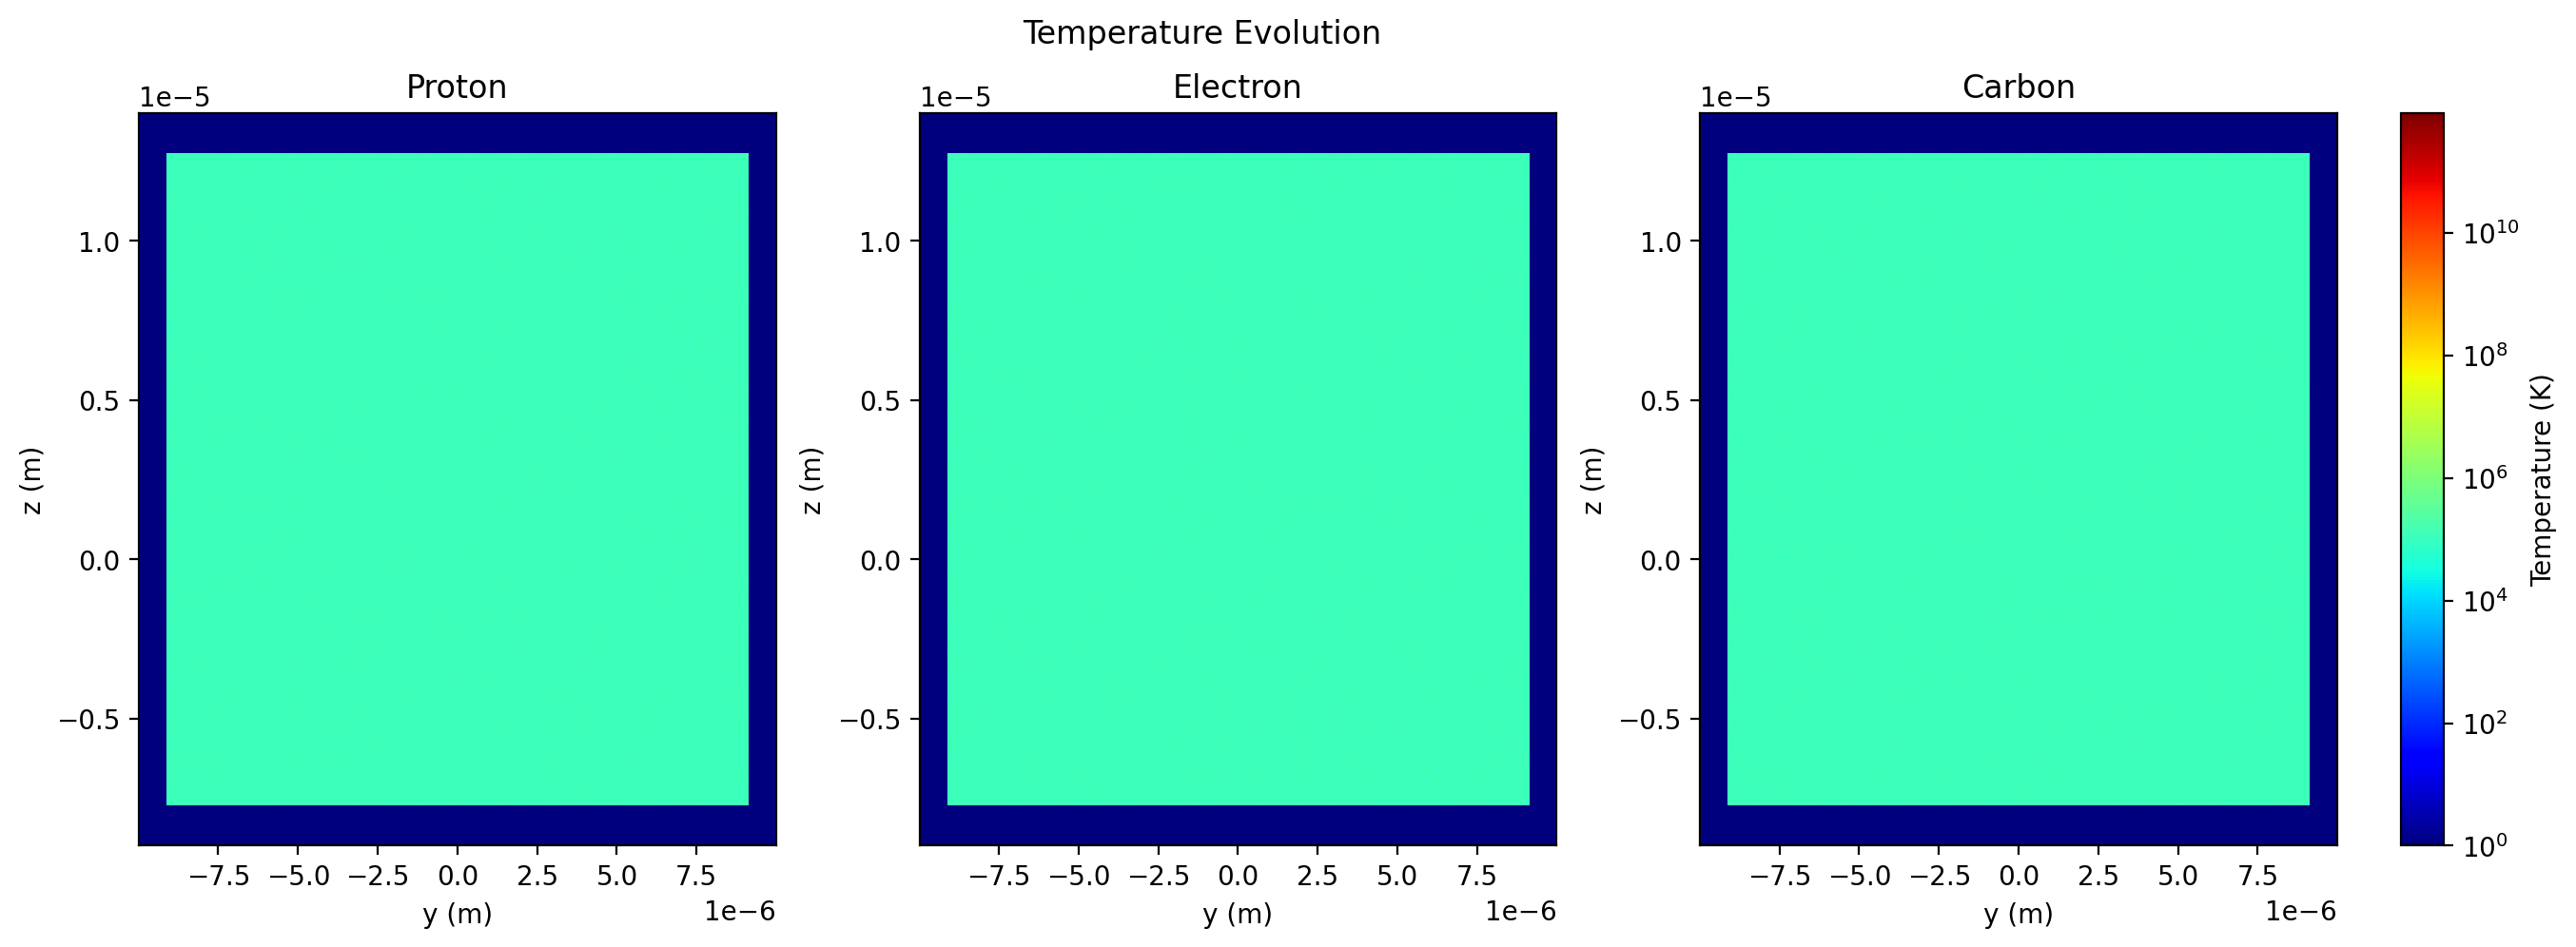

In [13]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

temperatures = [proton_temperture, electron_temperature, carbon_temperature]
titles = ["Proton", "Electron", "Carbon"]
images = []

# Create the initial figure with three subplots and colorbars
vmin = 1
vmax = np.max([np.max(temperature) for temperature in temperatures])
norm = LogNorm(vmin=vmin, vmax=vmax)
cmap = "jet"

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
cbar_ax = fig.add_axes([0.92, 0.11, 0.015, 0.77])


for ax, temperature, title in zip(axs, temperatures, titles):
    img = ax.imshow(
        temperature[0, :, :].T + 1,
        origin="lower",
        extent=[x_array[0], x_array[-1], y_array[0], y_array[-1]],
        interpolation="nearest",
        norm=norm,
        cmap=cmap,
    )
    images.append(img)
    ax.set_title(title)
    ax.set_xlabel("y (m)")
    ax.set_ylabel("z (m)")

fig.colorbar(images[0], cax=cbar_ax, label=r"Temperature (K)")
fig.suptitle("Temperature Evolution")


# Define an update function for the animation
def update(i):
    for img, temperature in zip(images, temperatures):
        img.set_array(temperature[i, :, :].T + 1)


# Create an animation
ani = animation.FuncAnimation(fig, update, frames=range(proton_temperture.shape[0]), blit=False)

plt.show()

In [14]:
ani.save(os.path.join(media_folder, "temperature_yz.gif"), fps=10, dpi=300)